<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [1]:
np.random.normal(loc=5, scale=2, size=10)
# generate 10 normal random numbers with mean 5 and standard deviation 2


array([3.84854336, 2.29233925, 2.95170206, 7.13393748, 2.08050916,
       4.76092587, 4.89218554, 7.90998368, 4.65873952, 7.05234863])

### 1.2 Visualising the random numbers

In [1]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Value of random number')

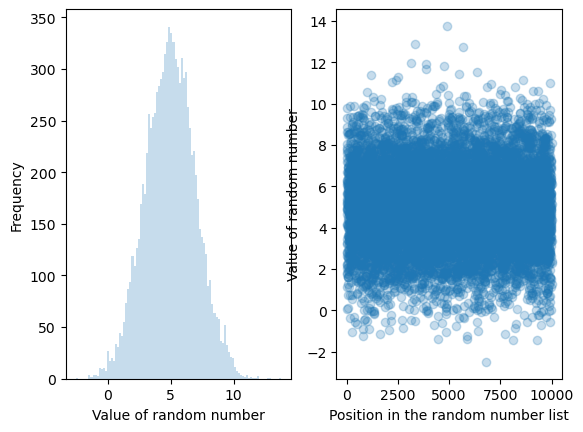

In [4]:
n = 10_000
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")


### 1.3 68%?

In [8]:
n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)
# only consider the random numbers that are one standard deviation away from the mean
print(np.array(random_numbers[mask]))

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')
# around 68%

[5.51987317 5.68475304 4.90643206 ... 3.03084943 4.22138754 4.38061444]
% of points between 1 std.dev. from the mean: 68.07%


## 1 Brownian Motion in 1D

### 1.1 The scenario

In [2]:
import numpy.random as rnd

### 1.2 The simulation

In [16]:
def brown_1d(prob_right=.5, no_of_steps=10000): # 50/50 chance of moving either right or left with each step
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right by 1 if the random number is less than 0.5
            x += step_size              # if i change prob_right to 0.3, will move right be rnd.random() > prob_right instead?
        else:
            x -= step_size              # else go left by 1

    return x


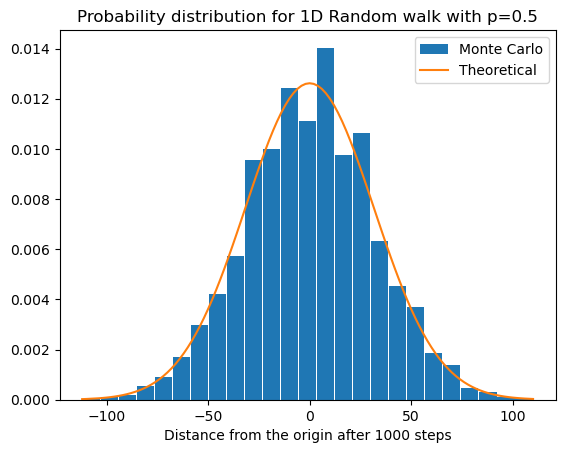

In [22]:
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)] # list of final locations of x for 10000 simulations (1000 steps each)

plt.hist(results, bins=25, density=True, rwidth=0.95, label='Monte Carlo') # density true to normalise area under curve to 1
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

prob_left = 1 - 0.5                              # q = 1 -p
mean = no_of_steps * (0.5 - prob_left)           # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*0.5*prob_left)        # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')
plt.legend()

# prob_right was undefined - why?


Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.7')

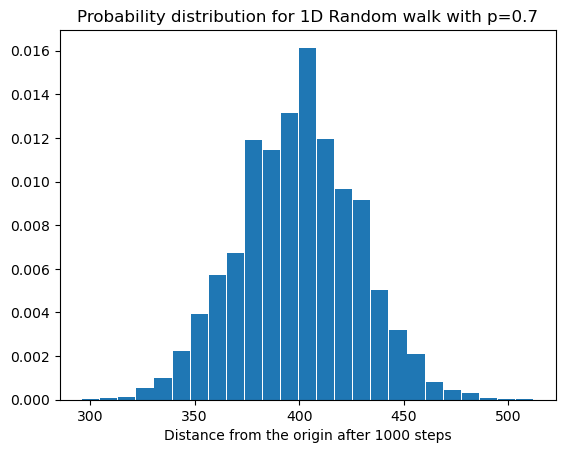

In [9]:
no_of_steps, p = 1_000, .7
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)] # list of final locations of x for 10000 simulations (1000 steps each)

plt.hist(results, bins=25, density=True, rwidth=0.95) # density true to normalise area under curve to 1
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

# still normal distrubution but the values are all shifted towards the right (larger number of steps to the right)


### 1.3 What does theory say?

## 2 Estimating \(\pi\)

### 2.1 The method

proportion of grains of sand that land in the circle as compared to the whole square is approximately the proportion of the whole circle as compared to the square

### 2.2 A poor but intuitive solution

In [23]:
N_total = 100_000
N_green = 0 # counter, may increase after each loop

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)    # x coord
    y = rnd.uniform(low=-1, high=1, size=1)    # y coord
    r = np.sqrt(x**2 + y**2)                   # Distance from the origin (1 throw)
                                               # (x-a)^2 + (y-b)^2 = r^2

    if r <= 1:
        N_green += 1                           # In or out of the circle because radius is 1, if coordinate is more than 1 the sand is definitely out of the circle 

4 * N_green / N_total                          # Estimate for pi

3.14244

### 2.3 A better solution

In [24]:
N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1) # sum all the grains of sand that land within the circle

4 * (N_green / N_total)


3.140584

### 2.4 A smarter solution

In [25]:
# we can limit the experiment to only one quarter of the square and the corresponding quadrant
# the ranges of x and y are now [0,1) (0 to 1, inclusive of 0 and exclusive of 1)

N_total=1_000_000
x=rnd.rand(N_total) # default low=0.0 and high=1.0 if not specified
y=rnd.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)


3.139328

## Exercise 1 :  Vital Stats of Random π

In [3]:
def estimate_pi(N_total):
    #N_total=1_000_000
    x=rnd.rand(N_total)
    #print(x)
    y=rnd.rand(N_total)
    #print(y)
    N_green=np.sum((x**2+y**2) <= 1)
    return 4 * (N_green / N_total)

#estimate_pi(10000) # toss 1mil grains of sand, get the number of grains that land in the circle, estimate pi using the equation
                     # repeat the tossing 10000 times



In [4]:
pi_estimates=[]
for i in range(100):
    x=estimate_pi(10_000)
    pi_estimates.append(x)
    #print(pi_estimates) # 100 estimates of pi using the estimate_pi function

pi_estimates_array=np.array(pi_estimates)
#print(pi_estimates_array)
mean_pi = np.mean(pi_estimates_array)
print(f'Mean value of pi is {mean_pi}')
std_pi = np.std(pi_estimates_array)
print(f'Standard deviation of pi estimates is {std_pi}')


Mean value of pi is 3.1412600000000004
Standard deviation of pi estimates is 0.015179288520876045


In [169]:
for n in range(1):
    pi_estimates=[]
    pi_estimates2=[]
    pi_estimates3=[]
    pi_estimates4=[]
    pi_estimates5=[]
    pi_estimates6=[]
    for i in range(10):
        exponential=1
        x=estimate_pi(10**exponential)
        pi_estimates.append(x)
    exponential+=1
    print(exponential)
    for i in range(10):
        x=estimate_pi(10**exponential)
        pi_estimates2.append(x)
    exponential+=1
    print(exponential)
    for i in range(10):
        x=estimate_pi(10**exponential)
        pi_estimates3.append(x)
    exponential+=1
    print(exponential)
    for i in range(10):
        x=estimate_pi(10**exponential)
        pi_estimates4.append(x)
    exponential+=1
    print(exponential)
    for i in range(10):
        x=estimate_pi(10**exponential)
        pi_estimates5.append(x)
    exponential+=1
    print(exponential)
    for i in range(10):
        x=estimate_pi(10**exponential)
        pi_estimates6.append(x)

#print(pi_estimates)
#print(pi_estimates2)
#print(pi_estimates3)
#print(pi_estimates4)
#print(pi_estimates5)
#print(pi_estimates6)

2
3
4
5
6


In [ ]:
# testing if the value of n in estimate_pi(n) is increasing
exponential=1
for n in range(1):
    pi_estimates1=[estimate_pi(10**exponential) for exponential in range(10)]
print(pi_estimates1)
exponential+=1
print(exponential)
for n in range(1):
    pi_estimates2=[estimate_pi(10**exponential) for exponential in range(10)]
print(pi_estimates2)
exponential+=1
print(exponential)
for n in range(1):
    pi_estimates3=[estimate_pi(10**exponential) for exponential in range(10)]
print(pi_estimates3)
exponential+=1
print(exponential)
for n in range(1):
    pi_estimates4=[estimate_pi(10**exponential) for exponential in range(10)]
print(pi_estimates4)
exponential+=1
print(exponential)
for n in range(1):
    pi_estimates5=[estimate_pi(10**exponential) for exponential in range(10)]
print(pi_estimates5)
exponential+=1
print(exponential)
for n in range(1):
    pi_estimates6=[estimate_pi(10**exponential) for exponential in range(10)]
print(pi_estimates6)



[4.0, 3.2, 3.04, 3.112, 3.1268, 3.1446, 3.143064, 3.141308, 3.14146716, 3.141587072]
2


In [ ]:
exponential=1
for n in range(1):
    pi_estimates1=[estimate_pi(10**exponential) for exponential in range(100)]
#print(pi_estimates1)
mean_pi1 = np.mean(np.array(pi_estimates1))
print(f'Mean value of pi when n={10**exponential} is {mean_pi1}')
std_pi1 = np.std(np.array(pi_estimates1))
print(f'Standard deviation of pi estimates when n={10**exponential} is {std_pi1}')
exponential+=1
#print(exponential)

for n in range(1):
    pi_estimates2=[estimate_pi(10**exponential) for exponential in range(100)]
#print(pi_estimates2)
mean_pi2 = np.mean(np.array(pi_estimates2))
print(f'Mean value of pi when n={10**exponential} is {mean_pi2}')
std_pi2 = np.std(np.array(pi_estimates2))
print(f'Standard deviation of pi estimates when n={10**exponential} is {std_pi2}')
exponential+=1
#print(exponential)

for n in range(1):
    pi_estimates3=[estimate_pi(10**exponential) for exponential in range(100)]
#print(pi_estimates3)
mean_pi3 = np.mean(np.array(pi_estimates3))
print(f'Mean value of pi when n={10**exponential} is {mean_pi3}')
std_pi3 = np.std(np.array(pi_estimates3))
print(f'Standard deviation of pi estimates when n={10**exponential} is {std_pi3}')
exponential+=1
#print(exponential)

for n in range(1):
    pi_estimates4=[estimate_pi(10**exponential) for exponential in range(100)]
#print(pi_estimates4)
mean_pi4 = np.mean(np.array(pi_estimates4))
print(f'Mean value of pi when n={10**exponential} is {mean_pi4}')
std_pi4 = np.std(np.array(pi_estimates4))
print(f'Standard deviation of pi estimates when n={10**exponential} is {std_pi4}')
exponential+=1
#print(exponential)

for n in range(1):
    pi_estimates5=[estimate_pi(10**exponential) for exponential in range(100)]
#print(pi_estimates5)
mean_pi5 = np.mean(np.array(pi_estimates5))
print(f'Mean value of pi when n={10**exponential} is {mean_pi5}')
std_pi5 = np.std(np.array(pi_estimates5))
print(f'Standard deviation of pi estimates when n={10**exponential} is {std_pi5}')
exponential+=1
#print(exponential)

for n in range(1):
    pi_estimates6=[estimate_pi(10**exponential) for exponential in range(100)]
#print(pi_estimates6)
mean_pi6 = np.mean(np.array(pi_estimates6))
print(f'Mean value of pi when n={10**exponential} is {mean_pi6}')
std_pi6 = np.std(np.array(pi_estimates6))
print(f'Standard deviation of pi estimates when n={10**exponential} is {std_pi6}')

# looks obscene...
# i cant run this again there is literally not enough memory

In [53]:
def forplotting(i):
    nlist=[]
    meanlist=[]
    stdlist=[]
    
    for exponential in range(1,7):
        n=10**exponential
        nlist.append(n)
    
        pi_estimates=[estimate_pi(n) for _ in range(100)]
        
        mean_pi=np.mean(pi_estimates)
        std_pi=np.std(pi_estimates)
        meanlist.append(mean_pi)
        stdlist.append(std_pi)
        
        print(f'n: {n}, mean: {mean_pi}, standard dev: {std_pi}')
    print(f'nlist: {nlist},\n meanlist: {meanlist},\n stdlist: {stdlist}')
    return nlist,meanlist,stdlist
        
forplotting(6)

n: 10, mean: 3.2359999999999998, standard dev: 0.5030944245367862
n: 100, mean: 3.137199999999999, standard dev: 0.13974319303636937
n: 1000, mean: 3.1366, standard dev: 0.04982007627453016
n: 10000, mean: 3.1451439999999997, standard dev: 0.01691125258518717
n: 100000, mean: 3.1413792000000003, standard dev: 0.005049880727304352
n: 1000000, mean: 3.1414536400000004, standard dev: 0.001558294256679405
nlist: [10, 100, 1000, 10000, 100000, 1000000],
 meanlist: [3.2359999999999998, 3.137199999999999, 3.1366, 3.1451439999999997, 3.1413792000000003, 3.1414536400000004],
 stdlist: [0.5030944245367862, 0.13974319303636937, 0.04982007627453016, 0.01691125258518717, 0.005049880727304352, 0.001558294256679405]


([10, 100, 1000, 10000, 100000, 1000000],
 [3.2359999999999998,
  3.137199999999999,
  3.1366,
  3.1451439999999997,
  3.1413792000000003,
  3.1414536400000004],
 [0.5030944245367862,
  0.13974319303636937,
  0.04982007627453016,
  0.01691125258518717,
  0.005049880727304352,
  0.001558294256679405])

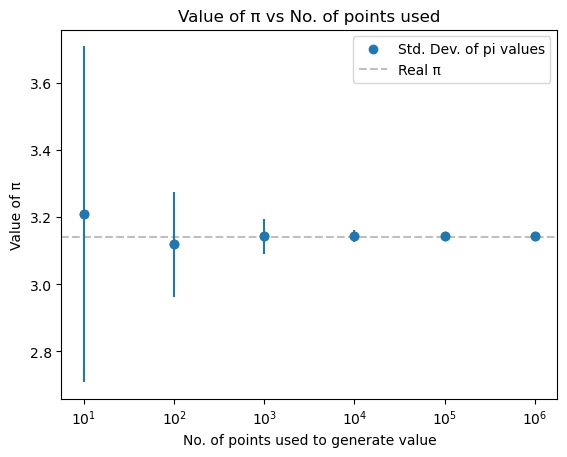

In [63]:
def forplotting(i):
    nlist=[]
    meanlist=[]
    stdlist=[]
    
    for exponential in range(1,7):
        n=10**exponential
        nlist.append(n)
    
        pi_estimates=[estimate_pi(n) for _ in range(100)]
        
        mean_pi=np.mean(pi_estimates)
        std_pi=np.std(pi_estimates)
        meanlist.append(mean_pi)
        stdlist.append(std_pi)
        
        #print(f'n: {n}, mean: {mean_pi}, standard dev: {std_pi}')
    #print(f'nlist: {nlist},\n meanlist: {meanlist},\n stdlist: {stdlist}')
    
#---plotting---
    plt.style.use('default')

    x = np.around(np.array(nlist),3)
    y = np.around(np.array(meanlist),3)
    y_err = np.around(np.array(stdlist),3)

    fig,ax=plt.subplots(nrows=1,ncols=1)
    plt.scatter(x, y, label='Std. Dev. of pi values', alpha=1)
    plt.xscale('log')
    #ax.set_ylim(2.8,3.4)

    plt.axhline(np.pi,label='Real π',ls='dashed',c='grey',alpha=.5)

    plt.errorbar(x,y,yerr=y_err,fmt='o')

    plt.minorticks_off()
    plt.ylabel('Value of π')
    plt.xlabel('No. of points used to generate value')
    plt.title('Value of π vs No. of points used')
    plt.legend(loc='upper right')
    plt.show()

forplotting(6)    
    

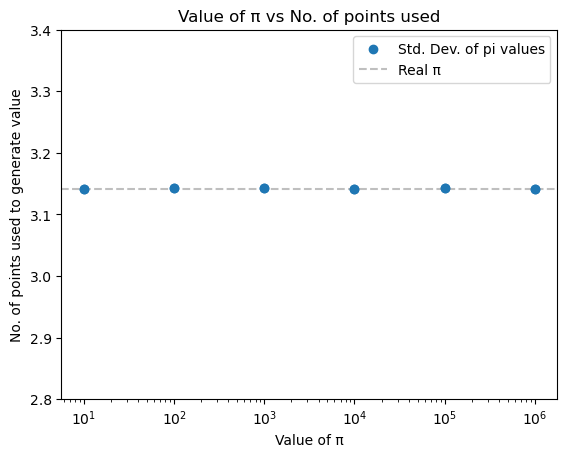

In [148]:
# meant for the very long code, DO NOT RUN
plt.style.use('default')

x = np.around(np.array([10,100,1000,10000,100000,1000000]),3)
y = np.around(np.array([mean_pi1,mean_pi2,mean_pi3,mean_pi4,mean_pi5,mean_pi6]),3)
y_err = np.array([std_pi1,std_pi2,std_pi3,std_pi4,std_pi5,std_pi6])

fig,ax=plt.subplots(nrows=1,ncols=1)
plt.scatter(x, y, label='Std. Dev. of pi values', alpha=1)
plt.xscale('log')
ax.set_ylim(2.8,3.4)

plt.axhline(np.pi,label='Real π',ls='dashed',c='grey',alpha=.5)

plt.errorbar(x,y,yerr=y_err,fmt='o')

plt.xlabel('Value of π')
plt.ylabel('No. of points used to generate value')
plt.title('Value of π vs No. of points used')
plt.legend(loc='upper right')
plt.show()
